# simple linear regression pake data Salary yang di udemy

## import library

In [1]:
import numpy as np
import math 
import matplotlib.pyplot as plt
import pandas as pd
import csv

In [6]:
dataset = pd.read_csv('Salary_Data.csv')
x = dataset.iloc[:, 0].values #x adalah years exp
y = dataset.iloc[:, 1].values # akan menebak gaji di variabel y 



In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)

## mencari nilai gradien, m, slope

## rumus gradien (m) adalah r * (Standar dev Y / standar dev X)

## rumus r = Σ((x - xmean)(y - ymean)) / √Σ(x - xmean)kuadrat * Σ(y - ymean)kuadrat

In [10]:
Xmean = sum(x_train) / len(x_train)
print(Xmean)

4.7299999999999995


In [11]:
Ymean = sum(y_train) / len(y_train)
print(Ymean)

71022.5


In [12]:
# menghitung nilai r (coefficient correlation)
r_pembilang = sum((x_train - Xmean) * (y_train - Ymean)) 
# tidak perlu di tunjuk satu persatu elemen dari x_train, akan otomatis semua elemen akan dikurangi Xmean
r_penyebut = pow(sum(pow((x_train - Xmean),2)) * sum(pow((y_train - Ymean),2)),0.5)# menghitung nilai r (coefficient correlation)
r_pembilang = sum((x_train - Xmean) * (y_train - Ymean)) 
# tidak perlu di tunjuk satu persatu elemen dari x_train, akan otomatis semua elemen akan dikurangi Xmean
r_penyebut = pow(sum(pow((x_train - Xmean),2)) * sum(pow((y_train - Ymean),2)),0.5)

In [13]:
print(r_pembilang)
print(r_penyebut)

1197047.0
1235850.1154597178


In [14]:
r = r_pembilang / r_penyebut
print(r)

0.9686020861475717


## Mencari nilai Standari deviasi dari y


In [15]:
Sy = pow(sum(pow(y_train - Ymean,2)) / (len(y_train) - 1),0.5)
print(Sy)

25052.147023233043


## Mencari nilai standar deviasi dari x

In [16]:
Sx = pow(sum(pow(x_train - Xmean,2)) / (len(x_train) - 1),0.5)
print(Sx)

2.5963739897666596


## memasukkan ke formula mencari gradien m

In [17]:
m = r * (Sy / Sx)
print(m)

9345.942443122376


## mencari nilai c atau intercept pada sumbu Y

In [18]:
c = Ymean - (m * Xmean)
print(c)

26816.19224403117


# Visualising the Training set results

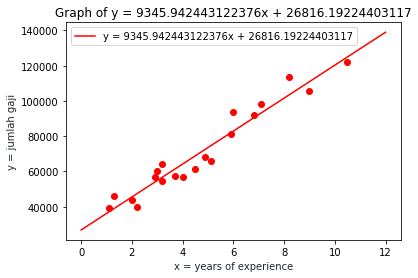

In [25]:
x = np.linspace(0,12, 20)
y = m * x + c
plt.plot(x, y, '-r', label="y = {m}x + {c}".format(m = m, c = c))
plt.plot(x_train, y_train, 'ro')

plt.title("Graph of y = {m}x + {c}".format(m = m, c = c))
plt.xlabel('x = years of experience', color='#1C2833')
plt.ylabel('y = jumlah gaji', color='#1C2833')
plt.legend(loc='upper left')

plt.show()

In [20]:
print(x_test)  # ini adalah megapiksel kamera hp yang harganya belum ditentukan

[ 1.5 10.3  4.1  3.9  9.5  8.7  9.6  4.   5.3  7.9]


In [21]:
print(y_test)  # ini adalah harga yang masih kosong dan ingin ditebak

[ 37731. 122391.  57081.  63218. 116969. 109431. 112635.  55794.  83088.
 101302.]


## Visualising the Test set results

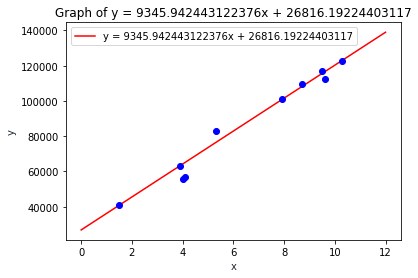

In [26]:
x = np.linspace(0,12, 20)
y = m * x + c
plt.plot(x, y, '-r', label="y = {m}x + {c}".format(m = m, c = c))
plt.plot(x_test, y_test, 'bo') # titik merah merepresentasikan data test yang sudah berhasil ditebak secara tepat

plt.title("Graph of y = {m}x + {c}".format(m = m, c = c))
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')

plt.show()

## menghitung residual (R squared) data test set berdasarkan persamaan regresi yang didapat dari train set

### makin besar presentase R squared maka makin bagus prediksi model regresinya

In [30]:
y_testMean = sum(y_test) / len(y_test)
print(y_testMean)

86274.41059087147


In [31]:
y_test

array([ 40835.10590871, 122391.        ,  57081.        ,  63218.        ,
       116969.        , 109431.        , 112635.        ,  55794.        ,
        83088.        , 101302.        ])

In [33]:
# pertama membuat Sum of squared dari mean (maksdunya tidak melihat dari sumbu x semuanya rata ke sumbu Y)
SSmean = 0
for x in y_test:
  rumus = pow((x - y_testMean),2)
  SSmean = SSmean + rumus

print(SSmean)

8091294943.553191


In [35]:
varMean = SSmean / len(y_test)
print(varMean)

809129494.3553191


In [36]:
x_test

array([ 1.5, 10.3,  4.1,  3.9,  9.5,  8.7,  9.6,  4. ,  5.3,  7.9])

In [38]:
#kedua membuat sum of squared dari fit artinya melihat dari garis regresi 
SSfit = 0
i = 0
for x in y_test:
  rumus = pow(x - (c + m * x_test[i]),2)
  SSfit = SSfit + rumus
  i = i+ 1

print(SSfit)

200624899.80259538


In [41]:
varFit = SSfit / len(y_test)
print(varFit)

20062489.980259538


## mencari nilai R squared 

In [43]:
Rsquared = (varMean - varFit) / varMean
print(Rsquared)

0.9752048465415978


In [44]:
## selesai sudah diketahui maka tingkat akurasi berdasarkan persamaan regresi 
# yang didapatkan dari train set lalu dites menggunakan test set adalah 97.5 persen